# Importing Prequisite Libraries

In [10]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statistics import mean
from scipy import stats
import eli5

#scikit-learn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [11]:
df=pd.read_csv('superstore_database.csv',encoding='latin-1')

In [12]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [13]:
#creating copies of original dataset
df1=df.copy()
df2=df.copy()

In [20]:
df.shape

(9994, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [26]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Data Preprocessing

In [14]:
#converting object datatype into date datatype
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [15]:
#below, i have divided the profit feature into 3 types for classification. [profit=0, loss=1, nil=2]
def div(value):
    if value<0.00:
        value=1
    elif value>0.00:
        value=0
    else:
        value=2
    return value

In [16]:
df['Profit']=df['Profit'].apply(lambda value: div(value))

# Single Variable Analysis

In [9]:
df['Order ID'].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64

<AxesSubplot:>

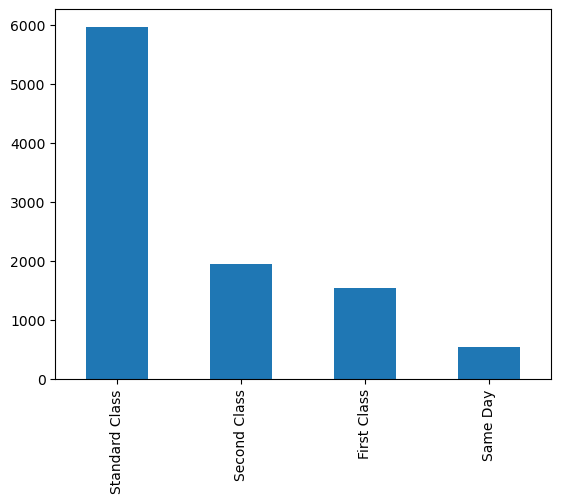

In [10]:
df['Ship Mode'].value_counts().plot.bar()
#below graph shows, most people prefer standard class ship mode.

<AxesSubplot:ylabel='Segment'>

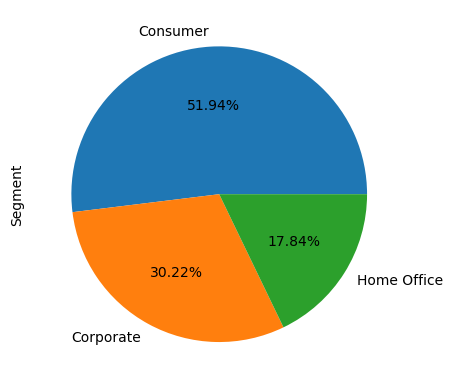

In [32]:
df['Segment'].value_counts().plot.pie(autopct='%.2f%%')
#below graph shows, More than half customer belongs through Consumer Segment.

In [35]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

<AxesSubplot:>

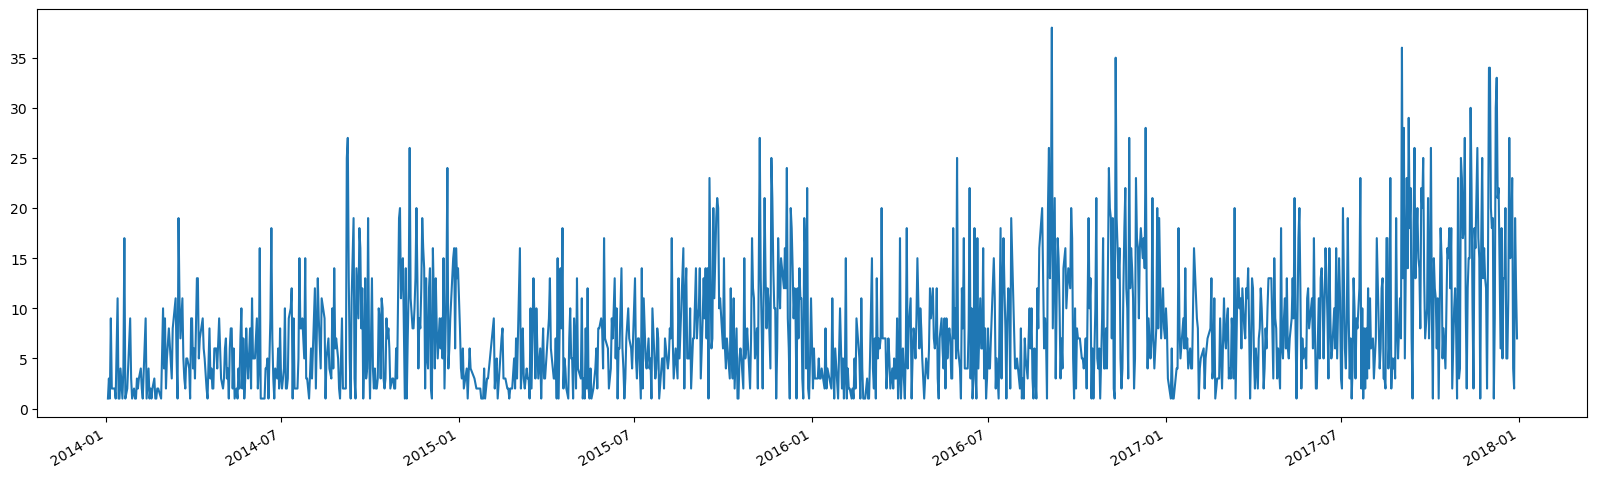

In [41]:
df['Order Date'].value_counts().plot.line(figsize=(20,6))

<AxesSubplot:>

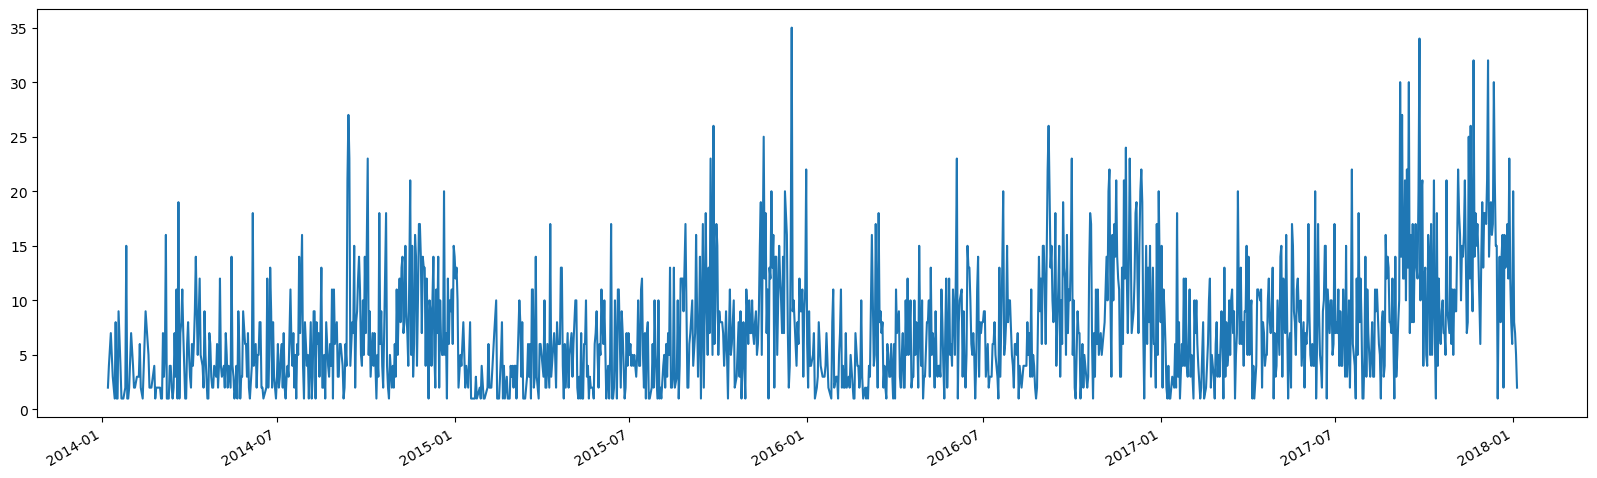

In [42]:
df['Ship Date'].value_counts().plot.line(figsize=(20,6))

<AxesSubplot:>

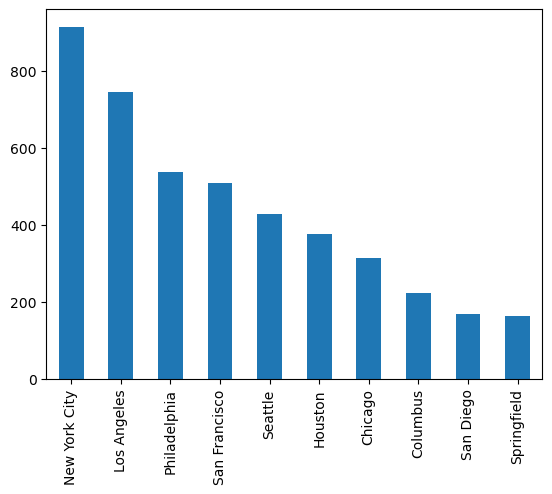

In [43]:
df['City'].value_counts().head(10).plot.bar()
#below graph shows, Top 10 cities in US have most orders placed 

<AxesSubplot:>

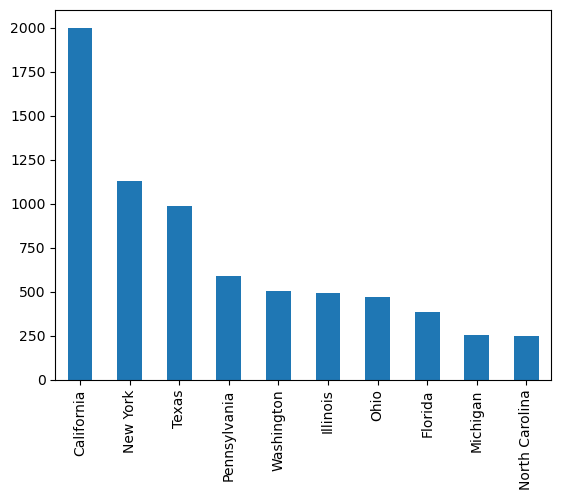

In [44]:
df['State'].value_counts().head(10).plot.bar()
#below graph shows, Top 10 states in US have most orders placed

<AxesSubplot:xlabel='State'>

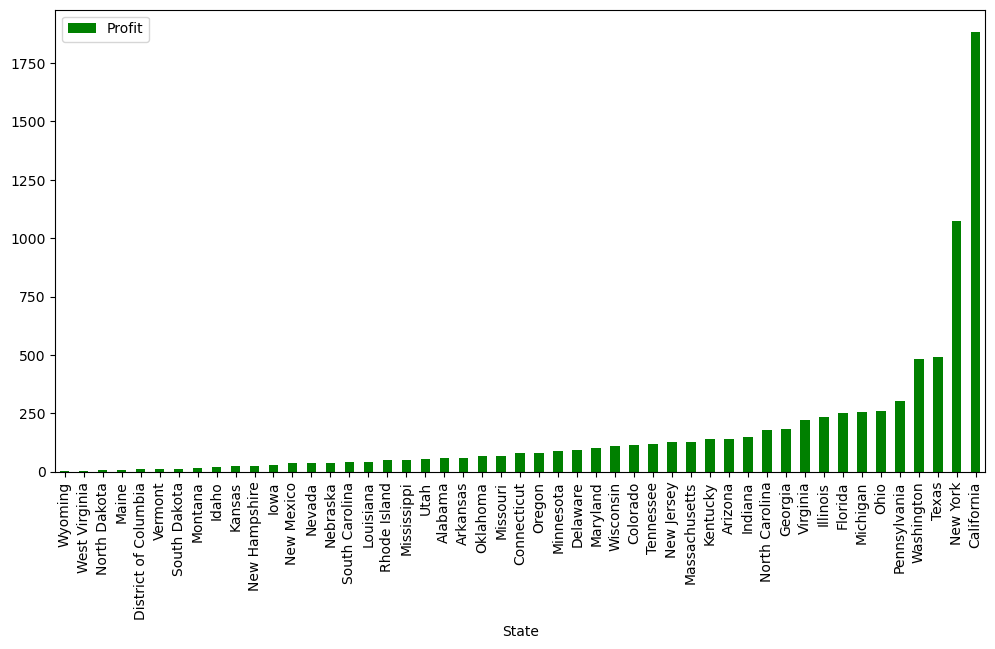

In [45]:
only_profit=df[df['Profit']==0]
op_plot=only_profit.groupby(['State']).agg({'Profit':'count'}).sort_values(by='Profit')
op_plot.plot(kind='bar', color='green', figsize=(12,6))
#below graph shows, California state is the most profitable state to take orders

<AxesSubplot:xlabel='State'>

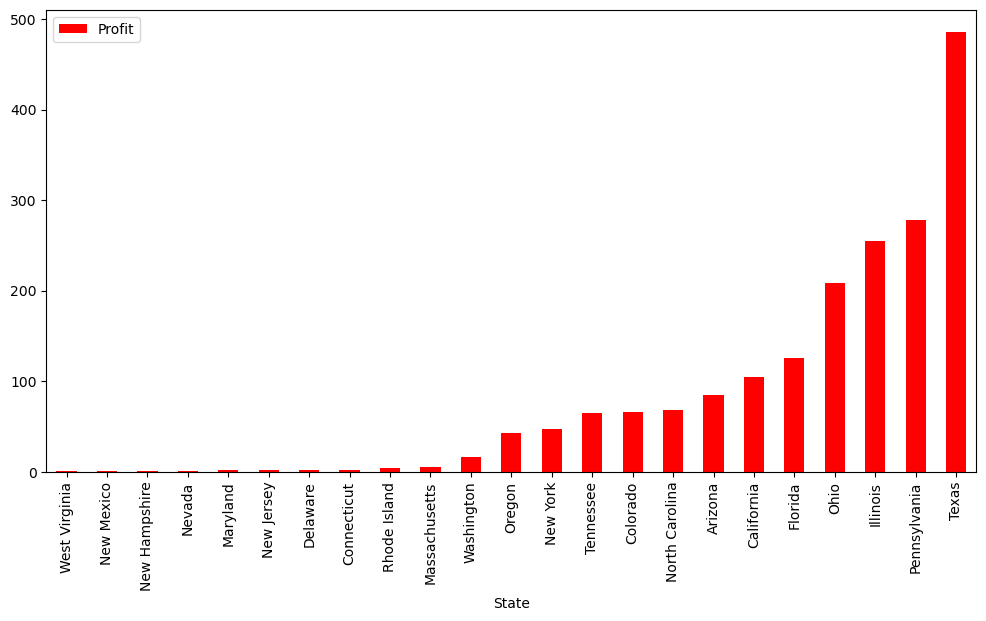

In [46]:
only_loss=df[df['Profit']==1]
ol_plot=only_loss.groupby(['State']).agg({'Profit':'count'}).sort_values(by='Profit')
ol_plot.plot(kind='bar', color='red',figsize=(12,6))
#below graph shows, Texas is the most loss making state to take orders

<AxesSubplot:ylabel='Region'>

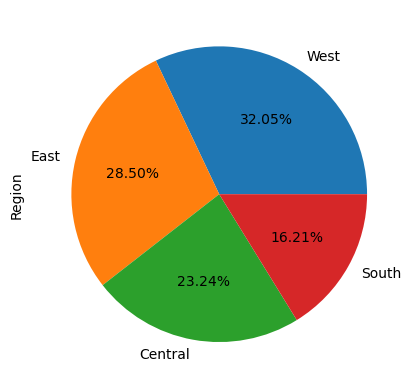

In [47]:
df['Region'].value_counts(normalize=True).plot.pie(autopct='%.2f%%')
#below graph shows, Most of the sales happen in West side of country

['Furniture' 'Office Supplies' 'Technology']


<AxesSubplot:>

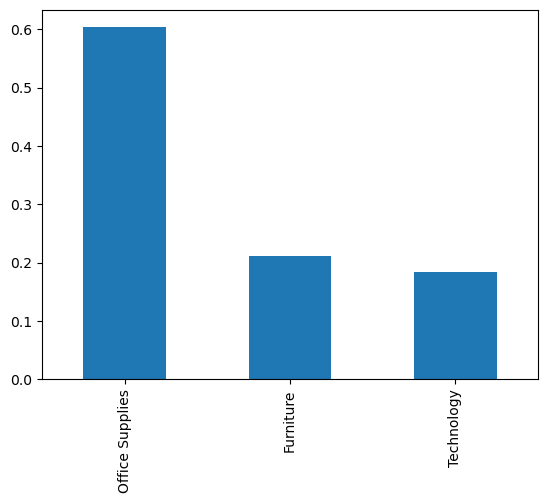

In [48]:
print(df['Category'].unique())
df['Category'].value_counts(normalize=True).plot.bar()
#below graph shows,  In sales category,office supplies leads

<AxesSubplot:>

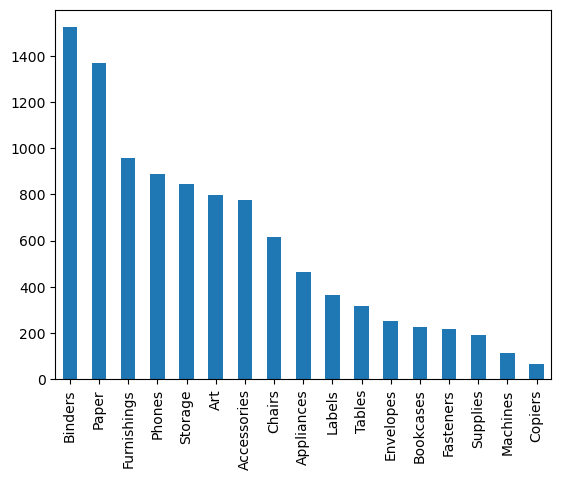

In [49]:
df['Sub-Category'].value_counts().plot.bar()

Independent Numerical Variables and its plotting

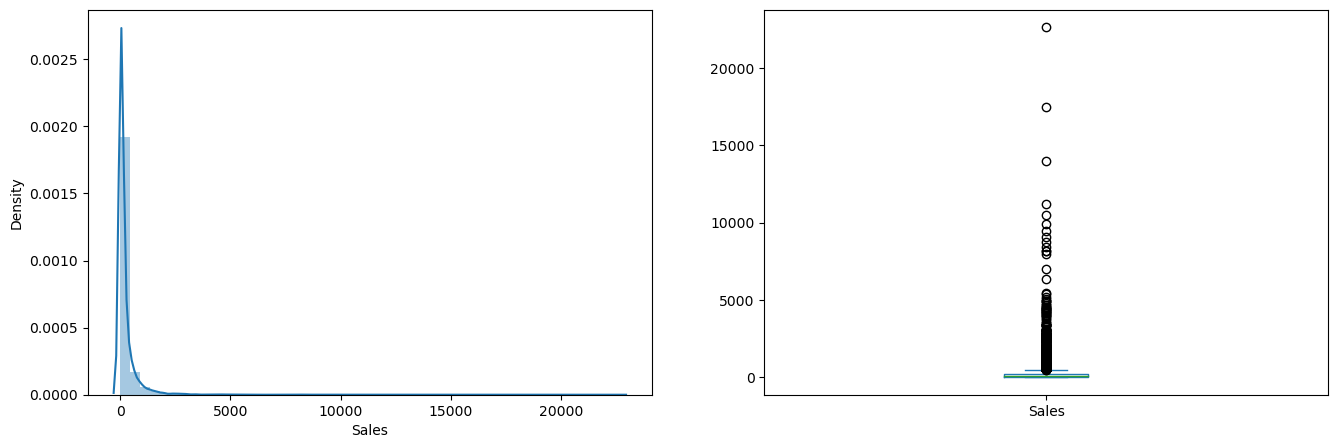

In [50]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Sales']); 
plt.subplot(122) 
df['Sales'].plot.box(figsize=(16,5)) 
plt.show()
#below graph shows, Sales column is continous numarical data so its spreaded in vast range. 
#Also, in 2nd fig., we can identify there are 3 outliers present in the data.

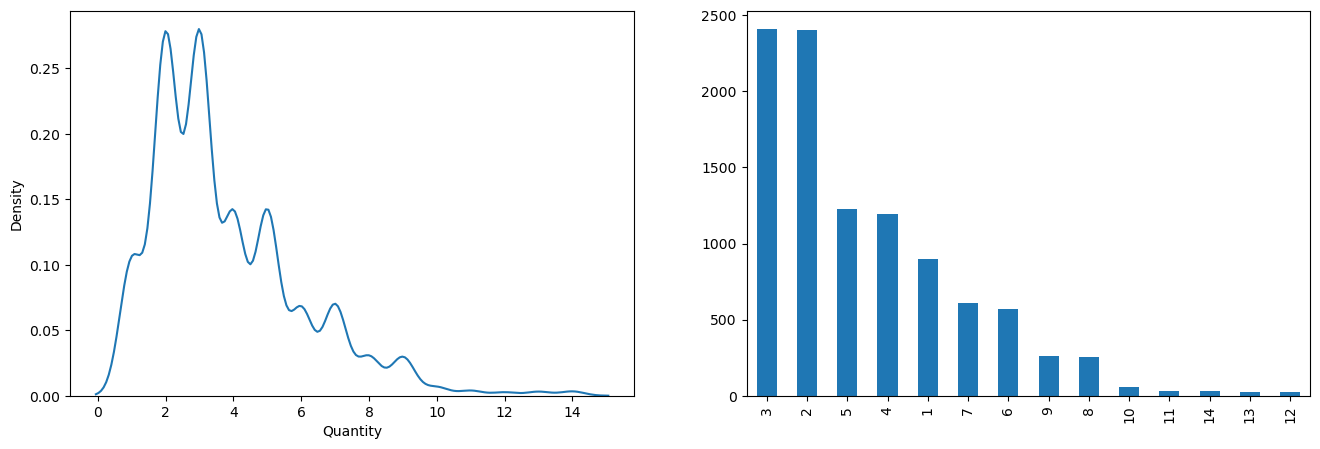

In [51]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(df['Quantity'])
plt.subplot(122)
df['Quantity'].value_counts().plot.bar(figsize=(16,5))
plt.show()
#below graph shows, mostly the order quantity is around 2 and 3.

<AxesSubplot:>

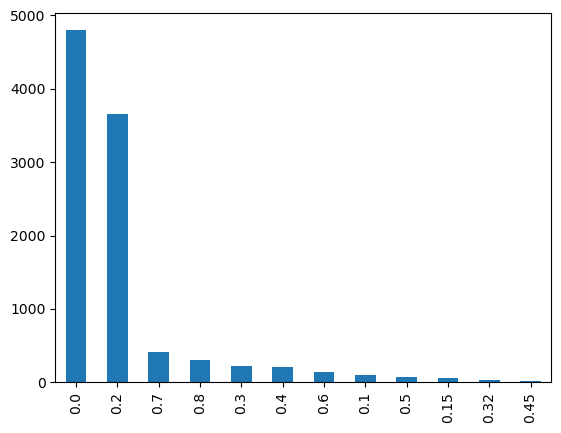

In [52]:
df['Discount'].value_counts().plot.bar()
#below graph shows, Mostly discount is provided between 0% to 20%.

# Categorical Independent Variable V/S Target Variable(Profit)


<AxesSubplot:xlabel='Ship Mode'>

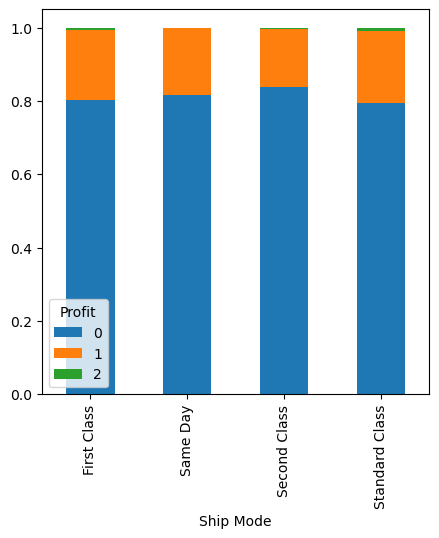

In [53]:
ship_mode=pd.crosstab(df['Ship Mode'],df['Profit'])
ship_mode.div(ship_mode.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
#below graph shows, Ship Mode does not affect on profit or loss.

<AxesSubplot:xlabel='Segment'>

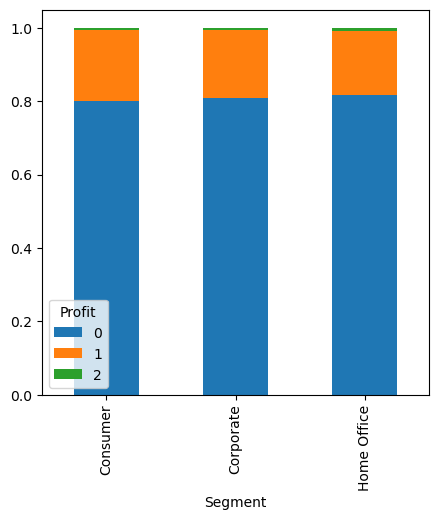

In [54]:
segment=pd.crosstab(df['Segment'],df['Profit'])
segment.div(segment.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
#below graph shows, There is no effect of Segment column on profit or loss.

<AxesSubplot:xlabel='City'>

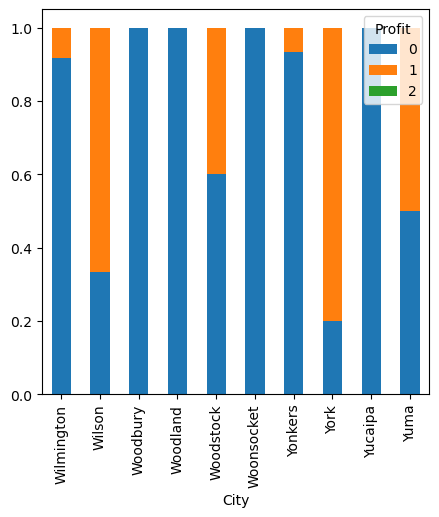

In [55]:
city=pd.crosstab(df['City'],df['Profit'])
city.div(city.sum(1).astype(float),axis=0).tail(10).plot(kind='bar', stacked=True, figsize=(5,5))
#below graph shows, there are 4 cities where possibility of profit is very high almost 100%. 

<AxesSubplot:xlabel='State'>

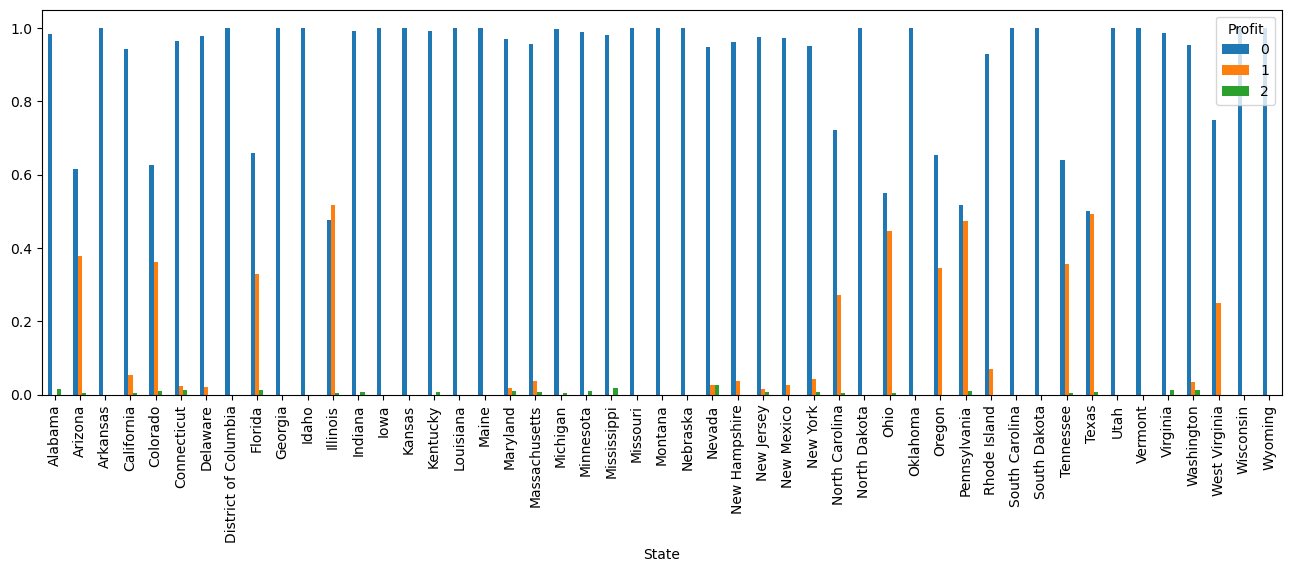

In [56]:
state=pd.crosstab(df['State'],df['Profit'])
state.div(state.sum(1).astype(float),axis=0).plot(kind='bar', stacked=False, figsize=(16,5))
#below graph shows, There are around 11 states where probablity of having loss is greater as compare to other.

<AxesSubplot:xlabel='Region'>

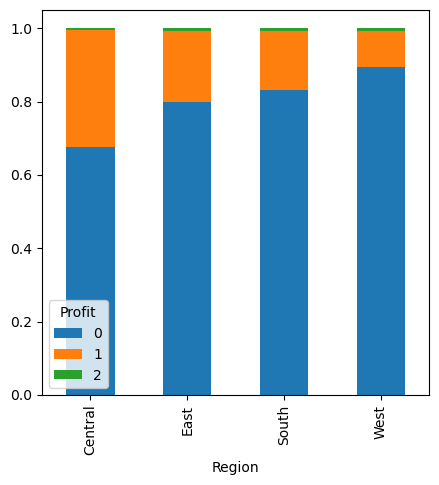

In [57]:
region=pd.crosstab(df['Region'],df['Profit'])
region.div(region.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
#below graph shows, posiblity of having loss central region is quit high as compare to other regions.

<AxesSubplot:xlabel='Category'>

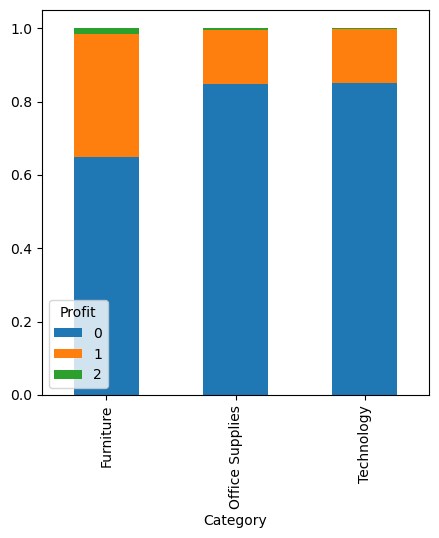

In [58]:
category=pd.crosstab(df['Category'],df['Profit'])
category.div(category.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(5,5))
#below graph shows, There is high possibility of gaining profit in all type of category.

<AxesSubplot:xlabel='Sub-Category'>

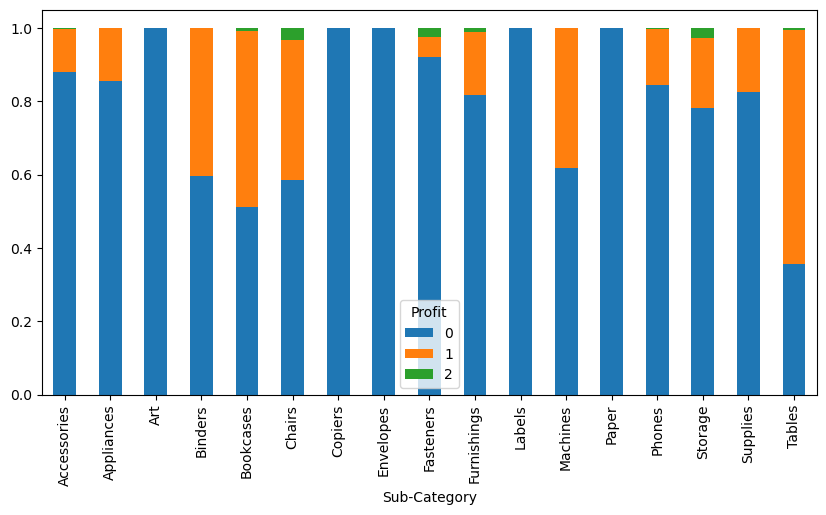

In [59]:
subcat=pd.crosstab(df['Sub-Category'],df['Profit'])
subcat.div(subcat.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(10,5))
#below graph shows, there are 5 Sub-categories where possibility of profit is very high almost 100%. 

# Date Variable Vs Profit

In [60]:
df['Order Month'] = df['Order Date'].dt.month 
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

<AxesSubplot:xlabel='Order Month,Profit'>

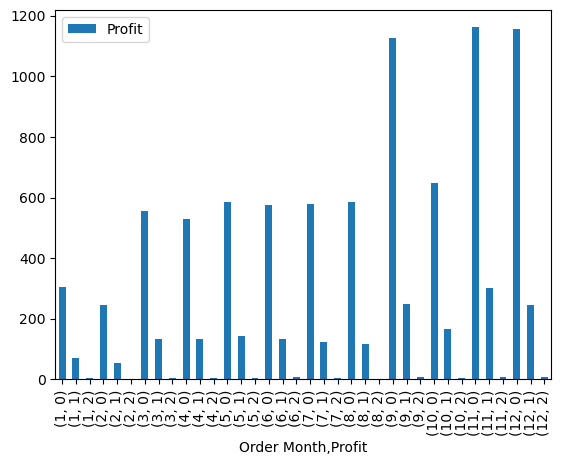

In [61]:
profit_by_month=df.groupby(['Order Month'])['Profit'].value_counts().to_frame()
profit_by_month.plot(kind='bar')
#below graph shows, Most of the profitable deals are made in months 9,11&12.

<AxesSubplot:xlabel='Order Year,Profit'>

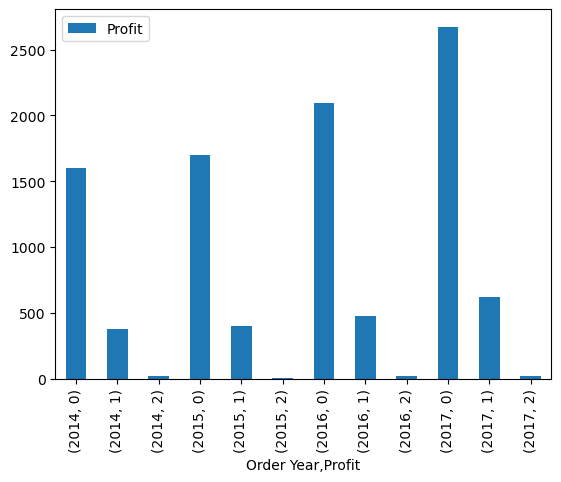

In [62]:
profit_by_year=df.groupby('Order Year')['Profit'].value_counts().to_frame()
profit_by_year.plot(kind='bar')
#below graph shows, In 2017 store made maximum profitable deals as compare to previous years.

In [63]:
df.drop(['Order Month', 'Order Year', 'Order Day of Week'],axis=1,inplace=True)

# Numerical Independent Variable V/S Target Variable(Profit)

Text(0, 0.5, 'Percentage')

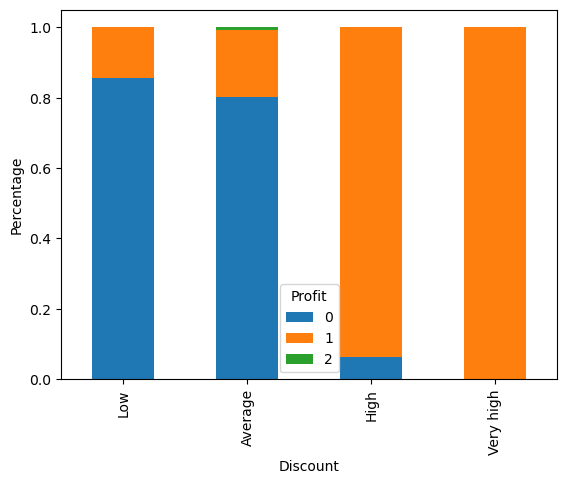

In [64]:
bins=[0,0.15,0.35,0.60,1.0] 
group=['Low','Average','High', 'Very high'] 
df['disc']=pd.cut(df['Discount'],bins,labels=group)
disc_bin=pd.crosstab(df['disc'],df['Profit']) 
disc_bin.div(disc_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Discount') 
plt.ylabel('Percentage')
#below graph shows, high discount means Loss.

In [65]:
df=df.drop(['disc'],axis=1)

<AxesSubplot:>

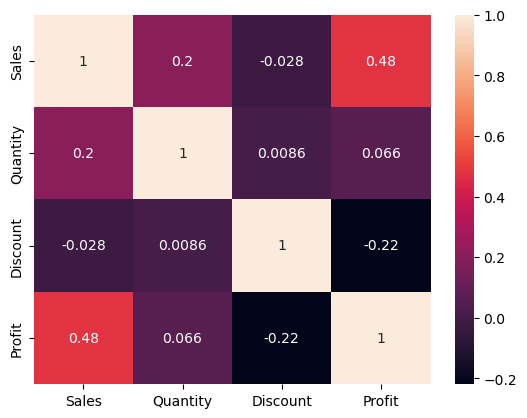

In [69]:
num_df=df1[['Sales','Quantity','Discount','Profit']]
sns.heatmap(num_df.corr(),annot=True)

# HandLing Missing Values

In [11]:
df.isnull().sum()
#below as you can see there are no null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Outlier Treatment

Removing outliers for making our data distribution normalize or standard.The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.

Lambda value used for Transformation: -0.0494946231919613


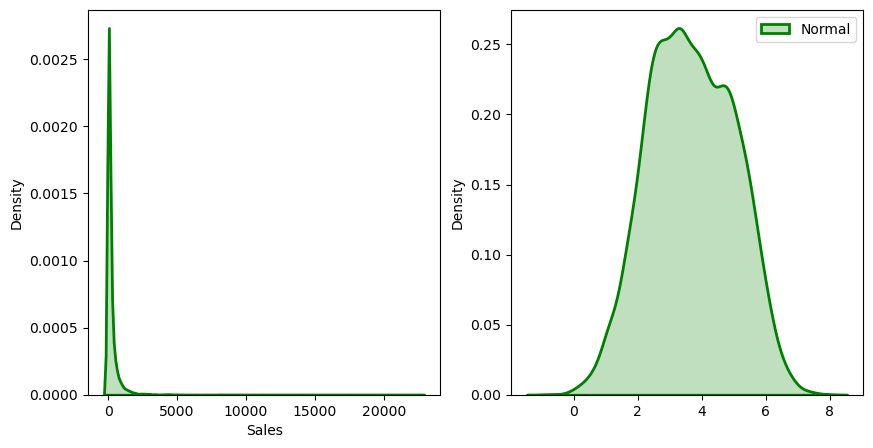

In [12]:
fitted_data1, fitted_lambda1 = stats.boxcox(df['Sales'])

fig, ax = plt.subplots(1, 2)
 
sns.distplot(df['Sales'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data1, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")

fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda1}")

Lambda value used for Transformation: 0.09933549161846916


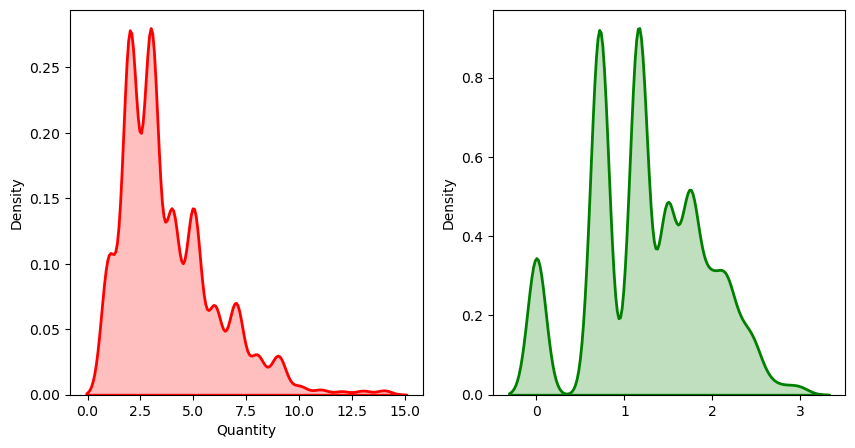

In [13]:
fitted_data2, fitted_lambda2 = stats.boxcox(df['Quantity'])

fig, ax = plt.subplots(1, 2)
 
sns.distplot(df['Quantity'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
 
sns.distplot(fitted_data2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda2}")

# Classification Models

In [17]:
X=df.drop('Profit', axis=1)
y=df['Profit']

In [18]:
X_enc=X.copy()
for col in X.columns:
    le = LabelEncoder() # we have used label encoding
    X_enc[col]=le.fit_transform(X[col].values)
    
X_enc.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,0,2500,864,929,2,143,166,0,0,194,15,217,2,12,0,4,386,4205,1,0
1,1,2500,864,929,2,143,166,0,0,194,15,217,2,55,0,5,839,5219,2,0
2,2,2296,732,787,2,237,201,1,0,266,3,517,3,946,1,10,1433,969,1,0
3,3,4372,519,568,3,705,687,0,0,153,8,170,2,319,0,16,366,5392,4,7
4,4,4372,519,568,3,705,687,0,0,153,8,170,2,1316,1,14,573,1360,1,3


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size=0.3)

Decision Tree

In [20]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=9)
dt.fit(X_train, y_train)
dt.score(X_train,y_train),dt.score(X_test, y_test)

(0.9756969263759828, 0.9436478826275425)

In [21]:
y_pred1=dt.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2422
           1       0.89      0.84      0.87       558
           2       0.00      0.00      0.00        19

    accuracy                           0.94      2999
   macro avg       0.62      0.61      0.61      2999
weighted avg       0.94      0.94      0.94      2999



<AxesSubplot:>

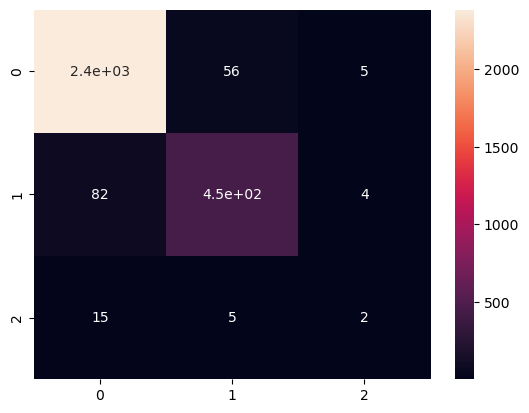

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

Random Forest

In [22]:
rf=RandomForestClassifier(100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rf.score(X_train,y_train), rf.score(X_test,y_test)


(1.0, 0.9463154384794932)

In [24]:
y_pred2=rf.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2422
           1       0.93      0.80      0.86       558
           2       0.00      0.00      0.00        19

    accuracy                           0.95      2999
   macro avg       0.63      0.60      0.61      2999
weighted avg       0.94      0.95      0.94      2999



<AxesSubplot:>

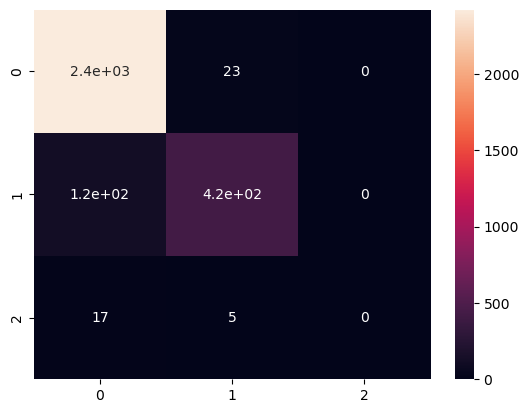

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

Support Vector Machine

In [25]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_train,y_train), svm.score(X_test,y_test)

(0.8057183702644746, 0.8076025341780594)

In [26]:
y_pred3=svm.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2422
           1       0.00      0.00      0.00       558
           2       0.00      0.00      0.00        19

    accuracy                           0.81      2999
   macro avg       0.27      0.33      0.30      2999
weighted avg       0.65      0.81      0.72      2999



<AxesSubplot:>

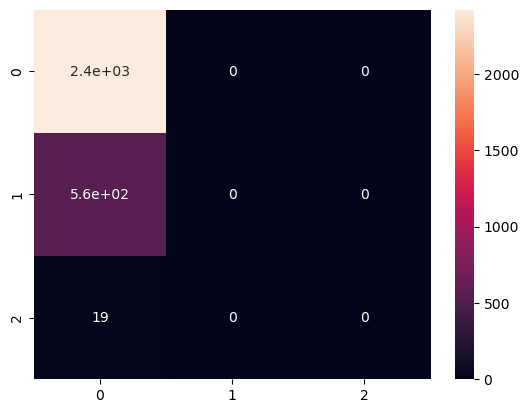

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)

K-Nearest Neighbors

In [28]:
knn=KNeighborsClassifier(n_neighbors=21, metric='manhattan')
knn.fit(X_train,y_train)
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.8243030736240171, 0.8176058686228743)

In [29]:
y_pred4=knn.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2422
           1       0.62      0.11      0.19       558
           2       0.00      0.00      0.00        19

    accuracy                           0.82      2999
   macro avg       0.48      0.37      0.36      2999
weighted avg       0.78      0.82      0.76      2999



<AxesSubplot:>

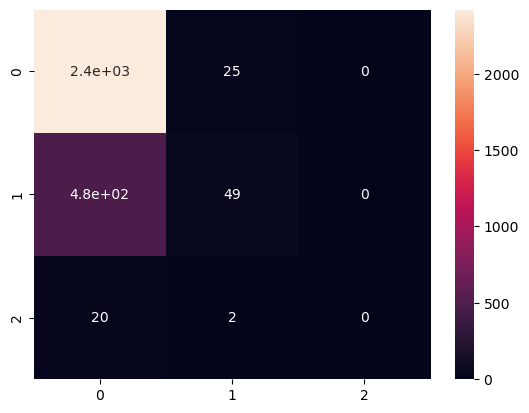

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True)

Naive Bayes Classifier

In [48]:
nbc=GaussianNB()
nbc.fit(X_train, y_train)
nbc.score(X_train, y_train), nbc.score(X_test, y_test)

(0.936097212294496, 0.9403134378126042)

In [49]:
y_pred8=nbc.predict(X_test)
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96      2422
           1       0.97      0.73      0.83       558
           2       0.00      0.00      0.00        19

    accuracy                           0.94      2999
   macro avg       0.63      0.58      0.60      2999
weighted avg       0.94      0.94      0.93      2999



<AxesSubplot:>

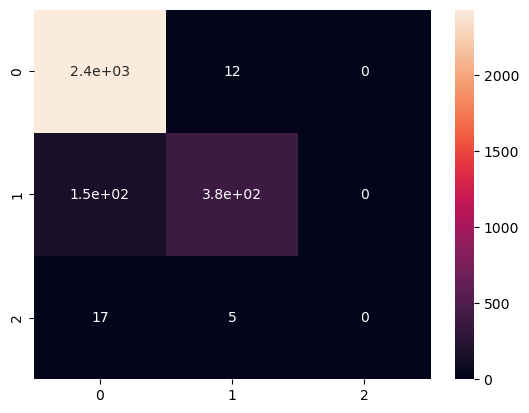

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred8), annot=True)

Logistic Regression

In [31]:
logr=LogisticRegression()
logr.fit(X_train,y_train)
logr.score(X_train,y_train), logr.score(X_test,y_test)

(0.8134381701215153, 0.8172724241413805)

In [33]:
y_pred5=logr.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2422
           1       0.65      0.11      0.19       558
           2       0.00      0.00      0.00        19

    accuracy                           0.82      2999
   macro avg       0.49      0.37      0.36      2999
weighted avg       0.79      0.82      0.76      2999



<AxesSubplot:>

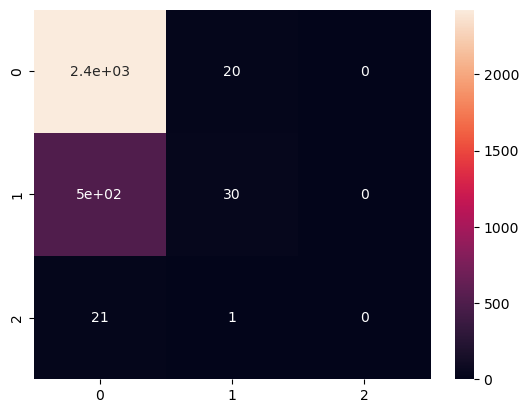

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True)

XGBooost

In [34]:
xgb=XGBClassifier(n_estimators=50, max_depth=9)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train), xgb.score(X_test,y_test)

(1.0, 0.962320773591197)

In [35]:
y_pred6=xgb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2422
           1       0.92      0.89      0.91       558
           2       0.50      0.05      0.10        19

    accuracy                           0.96      2999
   macro avg       0.80      0.64      0.66      2999
weighted avg       0.96      0.96      0.96      2999



<AxesSubplot:>

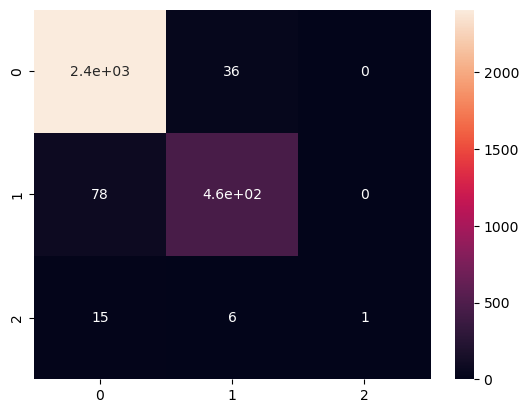

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred6),annot=True)

AdaBoost

In [36]:
ada=AdaBoostClassifier(n_estimators=50)
ada.fit(X_train,y_train)
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.8913509649749821, 0.8962987662554185)

In [37]:
y_pred7=ada.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2422
           1       0.84      0.82      0.83       558
           2       0.00      0.00      0.00        19

    accuracy                           0.90      2999
   macro avg       0.60      0.58      0.59      2999
weighted avg       0.93      0.90      0.91      2999



<AxesSubplot:>

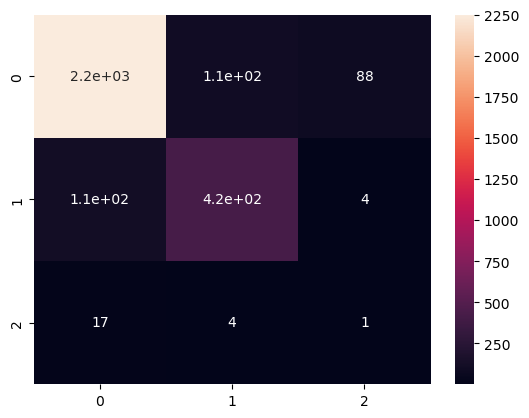

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred7),annot=True)

# Hyperparameter Tunning

We will try to improve the accuracy by tuning the hyperparameters for this model. 
We will use grid search and randomized search to get the optimized values of hyper parameters. 

In [48]:
#Best parameter values for Randomforest.
paramgrid_rf = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search_rf=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid_rf)
grid_search_rf.fit(X_train,y_train)
rf_best=grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=17, n_estimators=161, random_state=1)

In [63]:
#Best parameter values for Decision Tree.

paramgrid_dt = {'max_depth': list(range(1, 20, 2))}
grid_search_dt=GridSearchCV(DecisionTreeClassifier(random_state=1),paramgrid_dt)
grid_search_dt.fit(X_train,y_train)
dt_best=grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=9, random_state=1)

In [ ]:
#Best parameter values for SVM.  'linear’, ‘poly’, ‘rbf’, ‘sigmoid’

paramgrid_svm = {'kernel':['linear','poly','rbf','sigmoid'], 'C': list(range(1, 20, 2))}
grid_search_svm=RandomizedSearchCV(SVC(random_state=1),paramgrid_svm,n_iter=30)
grid_search_svm.fit(X_train,y_train)
svm_best=grid_search_svm.best_estimator_
svm_best

In [45]:
#Best parameter values for Knn.

paramgrid_knn = {'n_neighbors': list(range(1, 25, 2)), 'metric':['minkowski','manhattan']}
grid_search_knn=RandomizedSearchCV(KNeighborsClassifier(),paramgrid_knn,n_iter=20)
grid_search_knn.fit(X_train,y_train)
knn_best=grid_search_knn.best_estimator_
knn_best

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

#Best parameter values for Logesstic Regression.

paramgrid_lr = {'penalty':['l1','l2','elasticnet', None], 'C': list(range(1, 20, 1))}
grid_search=GridSearchCV(LogisticRegression(random_state=1),paramgrid_lr)
grid_search.fit(X_train,y_train)
lr_best=grid_search.best_estimator_
lr_best

#Best parameter values for XGBoost.

paramgrid_xgb = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search_xgb=GridSearchCV(XGBClassifier(random_state=1),paramgrid_xgb)
grid_search_xgb.fit(X_train,y_train)
xgb_best=grid_search_xgb.best_estimator_
xgb_best

# Feature Importance

In [49]:
eli5.explain_weights(dt, feature_names=list(X.columns))

Weight,Feature
0.7410,Discount
0.0685,Product ID
0.0655,Sub-Category
0.0478,Product Name
0.0199,Sales
0.0100,Row ID
0.0077,City
0.0065,Order ID
0.0053,Postal Code
0.0045,Segment


In [50]:
eli5.show_prediction(dt, X_test.iloc[1],feature_names=list(X.columns),show_feature_values=True)

In [51]:
eli5.explain_weights(rf, feature_names=list(X.columns))

Weight,Feature
0.4697 ± 0.3152,Discount
0.0833 ± 0.0822,Product ID
0.0534 ± 0.0628,Sub-Category
0.0514 ± 0.0948,State
0.0514 ± 0.0737,Postal Code
0.0416 ± 0.0317,Sales
0.0340 ± 0.0215,Product Name
0.0262 ± 0.0158,Order ID
0.0247 ± 0.0333,City
0.0222 ± 0.0410,Category


In [54]:
eli5.show_prediction(rf, X_test.iloc[10],feature_names=list(X.columns),show_feature_values=True)

In [55]:
eli5.explain_weights(logr, feature_names=list(X.columns))

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='City', weight=0.0031389837737375867, std=None, value=None), FeatureWeight(feature='Postal Code', weight=0.0017035417238022656, std=None, value=None), FeatureWeight(feature='Customer ID', weight=0.001204866141682921, std=None, value=None), FeatureWeight(feature='Region', weight=0.0007158421324932994, std=None, value=None), FeatureWeight(feature='Customer Name', weight=0.0006532803055190279, std=None, value=None), FeatureWeight(feature='Product ID', weight=0.0006242470787670948, std=None, value=None), FeatureWeight(feature='Order Date', weight=0.00043587844322867366, std=None, value=None), FeatureWeight(feature='Ship Date', weight=0.000338990515354317, std=None, value=None), FeatureWeight(feature='Quantity', weight=0.00031248361840504517, std=None, value=None), FeatureWeight(feature='Segment', weight=7.07659163032692e-05, std=None, value=None), FeatureWeight(feature='Category', weight=5.829094155189373e-05, std=None, value=None), FeatureWeight(feature='Row ID', weight=5.546320507423483e-05, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=4.835948310380857e-05, std=None, value=None), FeatureWeight(feature='Ship Mode', weight=4.115959955669958e-05, std=None, value=None)], neg=[FeatureWeight(feature='Discount', weight=-0.00748046991409356, std=None, value=None), FeatureWeight(feature='State', weight=-0.006743866692700623, std=None, value=None), FeatureWeight(feature='Sub-Category', weight=-0.00029828585654475344, std=None, value=None), FeatureWeight(feature='Product Name', weight=-0.0002134920835053071, std=None, value=None), FeatureWeight(feature='Order ID', weight=-0.00015207543029602513, std=None, value=None), FeatureWeight(feature='Sales', weight=-5.006187729940206e-05, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Discount', weight=0.00756716928536155, std=None, value=None), FeatureWeight(feature='State', weight=0.0071386311732856604, std=None, value=None), FeatureWeight(feature='Postal Code', weight=0.0017745733840441923, std=None, value=None), FeatureWeight(feature='Customer Name', weight=0.0011277953551689095, std=None, value=None), FeatureWeight(feature='Customer ID', weight=0.0005807256221108299, std=None, value=None), FeatureWeight(feature='City', weight=0.0003541754375375892, std=None, value=None), FeatureWeight(feature='Sub-Category', weight=0.0002701999979458415, std=None, value=None), FeatureWeight(feature='Ship Date', weight=0.00010757024492615746, std=None, value=None), FeatureWeight(feature='Order Date', weight=8.587680743444214e-05, std=None, value=None), FeatureWeight(feature='Row ID', weight=4.197160915412878e-05, std=None, value=None), FeatureWeight(feature='Order ID', weight=2.1820127581859178e-05, std=None, value=None)], neg=[FeatureWeight(feature='Region', weight=-0.0007053837638182603, std=None, value=None), FeatureWeight(feature='Product Name', weight=-0.0004659468899738381, std=None, value=None), FeatureWeight(feature='Product ID', weight=-0.000339624628736937, std=None, value=None), FeatureWeight(feature='Quantity', weight=-0.0002458135847080326, std=None, value=None), FeatureWeight(feature='Segment', weight=-6.404086707117646e-0

In [57]:
eli5.show_prediction(logr, X_test.iloc[50],feature_names=list(X.columns),show_feature_values=True)

In [58]:
eli5.explain_weights(xgb, feature_names=list(X.columns))

Weight,Feature
0.7527,Discount
0.0836,Sub-Category
0.0246,Product ID
0.0165,Product Name
0.0157,Region
0.0135,Sales
0.0096,Ship Mode
0.0089,Quantity
0.0087,City
0.0083,Order ID


In [59]:
eli5.explain_weights(ada, feature_names=list(X.columns))

Weight,Feature
0.2000 ± 0.8000,Product ID
0.2000 ± 0.8000,Product Name
0.1400 ± 0.6940,Discount
0.1000 ± 0.6000,Sales
0.0800 ± 0.5426,Customer ID
0.0600 ± 0.4750,Quantity
0.0600 ± 0.4750,City
0.0400 ± 0.3919,Postal Code
0.0200 ± 0.2800,Customer Name
0.0200 ± 0.2800,Sub-Category


## Only taking best Features

In [39]:
sort_X=X_enc[['Discount', 'Product Name', 'Sub-Category', 'Sales', 'Ship Mode', 'City']]
sort_X.head()

,Discount,Product Name,Sub-Category,Sales,Ship Mode,City
0,0,386,4,4205,2,194
1,0,839,5,5219,2,194
2,0,1433,10,969,2,266
3,7,366,16,5392,3,153
4,3,573,14,1360,3,153


In [40]:
sort_X_test=X_test[['Discount', 'Product Name', 'Sub-Category', 'Sales', 'Ship Mode', 'City']]
sort_X_test.head()

,Discount,Product Name,Sub-Category,Sales,Ship Mode,City
3406,4,759,5,4287,3,94
3363,0,673,3,1950,3,405
7475,0,896,3,5065,3,194
1009,3,930,13,3076,0,80
4487,11,61,3,1068,3,207


# Model Implementation Using K-fold cross validation

In [41]:
#Stratified K-Fold Cross Validation.
#Decision Tree

i=1 
score_dt=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = DecisionTreeClassifier(criterion='gini', max_depth=9) # i have not used dt_best bcoz its to time taking
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score) 
    score_dt.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_dt))


1 of kfold 5
accuracy_score 0.9409704852426213

2 of kfold 5
accuracy_score 0.9524762381190596

3 of kfold 5
accuracy_score 0.9439719859929965

4 of kfold 5
accuracy_score 0.9534767383691846

5 of kfold 5
accuracy_score 0.950950950950951


Average Accuracy we can achieve is:  0.9483692797349625


In [44]:
#Random Forest

i=1 
score_rf=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(max_depth=17, n_estimators=161, random_state=1) #rf_best    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)  
    score_rf.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_rf))


1 of kfold 5
accuracy_score 0.9504752376188094

2 of kfold 5
accuracy_score 0.9574787393696849

3 of kfold 5
accuracy_score 0.9439719859929965

4 of kfold 5
accuracy_score 0.9619809904952477

5 of kfold 5
accuracy_score 0.9569569569569569


Average Accuracy we can achieve is:  0.9541727820867391


In [46]:
#Support Vector Machine

i=1 
score_svm=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = SVC()  
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)  
    score_svm.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_svm))


1 of kfold 5
accuracy_score 0.8064032016008004

2 of kfold 5
accuracy_score 0.8064032016008004

3 of kfold 5
accuracy_score 0.8064032016008004

4 of kfold 5
accuracy_score 0.8059029514757379

5 of kfold 5
accuracy_score 0.8063063063063063


Average Accuracy we can achieve is:  0.8062837725168891


In [42]:
#KNN

i=1 
score_knn=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = KNeighborsClassifier(n_neighbors=21, metric='manhattan')    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)   
    score_knn.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_knn))


1 of kfold 5
accuracy_score 0.815407703851926

2 of kfold 5
accuracy_score 0.8294147073536768

3 of kfold 5
accuracy_score 0.8194097048524263

4 of kfold 5
accuracy_score 0.8124062031015508

5 of kfold 5
accuracy_score 0.8133133133133134


Average Accuracy we can achieve is:  0.8179903264945786


In [50]:
#Naive Bayes Classifier

i=1 
score_nbc=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = GaussianNB() # i have not used nbc_best bcoz its to time taking   
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)   
    score_nbc.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_nbc))


1 of kfold 5
accuracy_score 0.9244622311155578

2 of kfold 5
accuracy_score 0.9214607303651826

3 of kfold 5
accuracy_score 0.9059529764882441

4 of kfold 5
accuracy_score 0.9189594797398699

5 of kfold 5
accuracy_score 0.9214214214214215


Average Accuracy we can achieve is:  0.9184513678260552


In [51]:
#Logistic Regression

i=1 
score_logr=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression()  #lr_best  
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)   
    score_logr.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_logr))


1 of kfold 5
accuracy_score 0.8934467233616809

2 of kfold 5
accuracy_score 0.894447223611806

3 of kfold 5
accuracy_score 0.8649324662331166

4 of kfold 5
accuracy_score 0.8779389694847424

5 of kfold 5
accuracy_score 0.8878878878878879


Average Accuracy we can achieve is:  0.8837306541158467


In [52]:
#XGBoost

i=1 
score_xgb=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=9)    #xgb_best    
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)
    score_xgb.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_xgb))


1 of kfold 5
accuracy_score 0.9714857428714357

2 of kfold 5
accuracy_score 0.9699849924962481

3 of kfold 5
accuracy_score 0.9559779889944973

4 of kfold 5
accuracy_score 0.9699849924962481

5 of kfold 5
accuracy_score 0.9634634634634635


Average Accuracy we can achieve is:  0.9661794360643785


In [43]:
#AdaBoost

i=1 
score_ada=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(sort_X,y):  
    #print(train_index,test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = sort_X.loc[train_index],sort_X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = AdaBoostClassifier(n_estimators=50)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score) 
    score_ada.append(score)
    i+=1
    
print('\n\nAverage Accuracy we can achieve is: ', mean(score_ada))


1 of kfold 5
accuracy_score 0.8759379689844923

2 of kfold 5
accuracy_score 0.8244122061030515

3 of kfold 5
accuracy_score 0.8729364682341171

4 of kfold 5
accuracy_score 0.8899449724862432

5 of kfold 5
accuracy_score 0.9074074074074074


Average Accuracy we can achieve is:  0.8741278046430623


In [53]:
models=['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbour','Naive Bayes Classifier',
        'Logestic Regression', 'XGBoost', 'AdaBoost']
accuracy_scores=[mean(score_dt), mean(score_rf), mean(score_svm), mean(score_knn),mean(score_nbc),
                 mean(score_logr), mean(score_xgb), mean(score_ada)]
conc=pd.DataFrame({'Models': models, 'Accuracy score': accuracy_scores})
conc.set_index('Models', inplace=True)
conc.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy score
Models,
Decision Tree,0.948369
Random Forest,0.954173
Support Vector Machine,0.806284
K-Nearest Neighbour,0.817990
Naive Bayes Classifier,0.918451
Logestic Regression,0.883731
XGBoost,0.966179
AdaBoost,0.874128


As we can see XGBoost gives best accuracy